In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import logomaker as lm


In [2]:
df = pd.read_csv("../Data_Preparation/train_bench.tsv", sep="\t")
df

,EntryID,OrganismName,Kingdom,SequenceLength,HelixDomain,Class,SPStart,SPEnd,Set,Sequence
0,P32266,Saccharomyces cerevisiae (strain ATCC 204508 /...,Fungi,881,False,Negative,NaN,NaN,Benchmark,MNASPVRLLILRRQLATHPAILYSSPYIKSPLVHLHSRMSNVHRSA...
1,Q8N1N2,Homo sapiens,Metazoa,210,False,Negative,NaN,NaN,Benchmark,MVADIKGNEQIEKYSWREACDTGSSRMDRKHGKYILNVEHSENQPP...
2,Q94JY0,Arabidopsis thaliana,Viridiplantae,330,False,Negative,NaN,NaN,Benchmark,MGSISMHITPSTALPIRHFRARVSCCSSGHVSFIKDVAATEPPMHL...
3,Q8LDU1,Arabidopsis thaliana,Viridiplantae,321,False,Negative,NaN,NaN,Benchmark,MKSLVAHFSTPLITARLVPRCIIHRASISAVSFSTVRRRFSPLTMA...
4,Q9ZNT7,Arabidopsis thaliana,Viridiplantae,286,False,Negative,NaN,NaN,Benchmark,MSFNKVPNIPGAPALSALLKVSVIGGLGVYALTNSLYNVDGGHRAV...
...,...,...,...,...,...,...,...,...,...,...
10022,P47120,Saccharomyces cerevisiae (strain ATCC 204508 /...,Fungi,325,False,Negative,NaN,NaN,5,MSTNFEKHFQENVDECTLEQLRDILVNKSGKTVLANRFRALFNLKT...
10023,P08212,Pisum sativum,Viridiplantae,81,True,Negative,NaN,NaN,5,MNPLIAAASVIAAGLAVGLASIGPGVGQGTAAGQAVEGIARQPEAE...
10024,P53064,Saccharomyces cerevisiae (strain ATCC 204508 /...,Fungi,558,False,Negative,NaN,NaN,5,MSDLDEDLLALAGADESEEEDQVLTTTSAKRAKNNDQSLSKKRRIE...
10025,Q80TH2,Mus musculus,Metazoa,1402,False,Negative,NaN,NaN,5,MTTKRSLFVRLVPCRCLRGEEETVTTLDYSHCSLEQVPKEIFTFEK...


## Comparison of Sequence Lengths Between Positive and Negative Classes

In [3]:
# Create DataFrames to compare sequence lengths between positive and negative classes in both the training set and the 
# benchmark set.


df_length = df[["SequenceLength","Class","Set"]]

bench = []
train = []

for _, row in df_length.iterrows():
    if row["Set"] == "Benchmark":
        bench.append(row)
        
    else:
        train.append(row)
        
        
df_train = pd.DataFrame(train)
df_bench = pd.DataFrame(bench)

# In df_train, the "Class" column lists positive samples first, followed by the negative ones. Since Seaborn assigns colors 
# according to the order of categories, this would otherwise result in inconsistent color mapping across plots (e.g., positives 
# in green in one plot and in red in another). 
# To ensure consistency and improve readability, we inverted the row order of df_bench so that in both dataframes positive 
# samples appear first and negatives afterwards.

df_bench = df_bench.sort_index(ascending=False).reset_index(drop=True)

In [4]:
df_train

,SequenceLength,Class,Set
2006,84,Positive,1
2007,229,Positive,1
2008,259,Positive,1
2009,439,Positive,1
2010,563,Positive,1
...,...,...,...
10022,325,Negative,5
10023,81,Negative,5
10024,558,Negative,5
10025,1402,Negative,5


In [5]:
df_bench

,SequenceLength,Class,Set
0,452,Positive,Benchmark
1,81,Positive,Benchmark
2,338,Positive,Benchmark
3,732,Positive,Benchmark
4,87,Positive,Benchmark
...,...,...,...
2001,286,Negative,Benchmark
2002,321,Negative,Benchmark
2003,330,Negative,Benchmark
2004,210,Negative,Benchmark


In [6]:
sns.set_theme()
sns.set_theme(
     context='talk',
     style='whitegrid',
     palette=["green","red"],
     font='sans-serif',
     font_scale=0.5,
     color_codes=True
    )

### Protein Sequence Lengths in Training Set: Positive vs. Negative

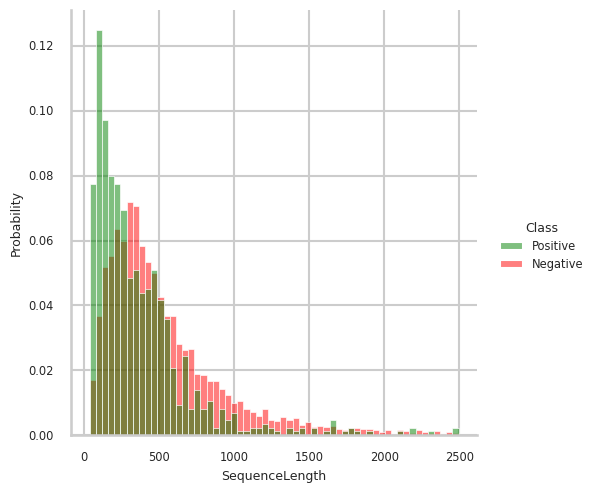

In [7]:
sns.displot(
    
     data = df_train[df_train["SequenceLength"]<=2500],
     x = "SequenceLength",
     hue = "Class",
     common_norm = False,
     stat = "probability",
   
    )
plt.savefig("sequence_length_training.png", dpi=300, bbox_inches="tight")

In [8]:
# We decided to focus on sequences up to a length of 2500 residues to improve the readability of the plot. 
# Our goal is to compare the length distribution between positive and negative sequences of the Training Set. 
# As we can see, sequences longer than 2500 residues are very few and mostly belong to the positive class, which means they do not 
# provide useful information for the comparison.

df_train.loc[(df_train["SequenceLength"] > 2500) & (df_train["Class"] == "Positive")]

,SequenceLength,Class,Set
2014,2813,Positive,1
2063,2530,Positive,1
2121,3351,Positive,1
2163,3083,Positive,1
2166,3380,Positive,1
2206,2586,Positive,2
2288,3330,Positive,2
2392,3396,Positive,3
2857,2692,Positive,5


In [9]:
df_train.loc[(df_train["SequenceLength"] > 2500) & (df_train["Class"] == "Negative")]

,SequenceLength,Class,Set
2962,2843,Negative,1
2981,3418,Negative,1
3032,2603,Negative,1
3104,2567,Negative,1
3222,2715,Negative,1
...,...,...,...
9419,4226,Negative,5
9519,3433,Negative,5
9534,2856,Negative,5
9655,8797,Negative,5


### Protein Sequence Lengths in Benchmark Set: Positive vs. Negative

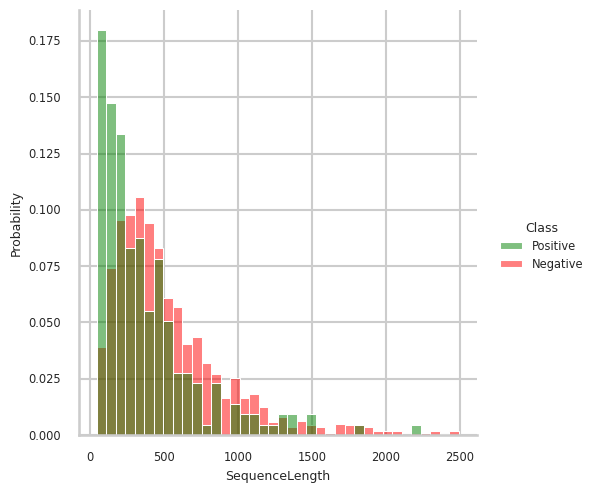

In [10]:
sns.displot(
    
     data = df_bench[df_bench["SequenceLength"]<=2500],
     x = "SequenceLength",
     hue = "Class",
     common_norm = False,
     stat = "probability"
    
    )

plt.savefig("sequence_length_benchmark.png", dpi=300, bbox_inches="tight")

In [11]:
# We decided to focus on sequences up to a length of 2500 residues to improve the readability of the plot. 
# Our goal is to compare the length distribution between positive and negative sequences of the Benchmark Set. 
# As we can see, sequences longer than 2500 residues are very few and mostly belong to the positive class, which means 
# they do not provide useful information for the comparison.

df_bench.loc[df_bench["SequenceLength"] > 2500]

,SequenceLength,Class,Set
16,5263,Positive,Benchmark
52,2898,Positive,Benchmark
264,3046,Negative,Benchmark
387,3122,Negative,Benchmark
627,2531,Negative,Benchmark
927,2684,Negative,Benchmark
1117,2752,Negative,Benchmark
1172,2618,Negative,Benchmark
1348,6548,Negative,Benchmark
1358,4062,Negative,Benchmark


## Comparison of Signal Peptide (SP) Lengths

In [12]:
# Create DataFrames to compare SP lengths in positive proteins between the training set and the benchmark set.

df_SP_length = df[["SequenceLength","Class","Set","SPEnd"]]

SP_dataset = []


for _, row in df_SP_length.iterrows():
    if pd.notna(row["SPEnd"]):
        SP_dataset.append(row)
        
    else:
        continue
    
        
        
df_SP_dataset = pd.DataFrame(SP_dataset)

In [13]:
df_SP_dataset["SPEnd"].dtype

dtype('float64')

In [14]:
df_SP_dataset

,SequenceLength,Class,Set,SPEnd
1787,311,Positive,Benchmark,32.0
1788,136,Positive,Benchmark,24.0
1789,150,Positive,Benchmark,20.0
1790,161,Positive,Benchmark,20.0
1791,69,Positive,Benchmark,23.0
...,...,...,...,...
2875,152,Positive,5,30.0
2876,539,Positive,5,28.0
2877,70,Positive,5,23.0
2878,1257,Positive,5,19.0


In [15]:
# Replace numeric subset values in the "Set" column with "Training" for proteins belonging to the training set

df_SP_dataset.loc[df_SP_dataset["Set"] != "Benchmark", "Set"] = "Training"

In [16]:
df_SP_dataset["Set"].unique()

array(['Benchmark', 'Training'], dtype=object)

In [17]:
df_SP_dataset

,SequenceLength,Class,Set,SPEnd
1787,311,Positive,Benchmark,32.0
1788,136,Positive,Benchmark,24.0
1789,150,Positive,Benchmark,20.0
1790,161,Positive,Benchmark,20.0
1791,69,Positive,Benchmark,23.0
...,...,...,...,...
2875,152,Positive,Training,30.0
2876,539,Positive,Training,28.0
2877,70,Positive,Training,23.0
2878,1257,Positive,Training,19.0


In [18]:
sns.set_theme()
sns.set_theme(
     context='talk',
     style='whitegrid',
     palette=["lightblue","magenta"],
     font='sans-serif',
     font_scale=0.5,
     color_codes=True
    )

### Signal Peptide (SP) Lengths in Training vs. Benchmark Sets

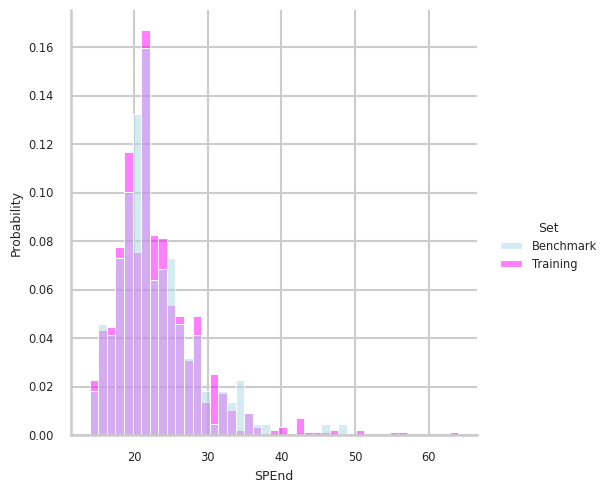

In [19]:
sns.displot(
    
     data = df_SP_dataset,
     x = "SPEnd",
     hue = "Set",
     common_norm = False,
     stat = "probability"
    
    )

plt.savefig("sp_length_train_vs_bench.png", dpi=300, bbox_inches="tight")

## Comparison between the aminoacidic frequencies of the SP in our dataset and the aminoacidic frequencies of SwissProt

### Step1: compute the aa frequencies of the SPs in our dataset

In [20]:
#set the theme
sns.set_theme(
    context="paper",
    style="darkgrid",
    palette="deep",
    font="sans-serif",
    font_scale=1,
    color_codes=True,
    rc=None    
)

In [21]:
# take the .tsv with all the data and put it in a dataframe
df=pd.read_csv("../Data_Preparation/train_bench.tsv" , sep="\t")
print(len(df))
df.head()

10027


,EntryID,OrganismName,Kingdom,SequenceLength,HelixDomain,Class,SPStart,SPEnd,Set,Sequence
0,P32266,Saccharomyces cerevisiae (strain ATCC 204508 /...,Fungi,881,False,Negative,NaN,NaN,Benchmark,MNASPVRLLILRRQLATHPAILYSSPYIKSPLVHLHSRMSNVHRSA...
1,Q8N1N2,Homo sapiens,Metazoa,210,False,Negative,NaN,NaN,Benchmark,MVADIKGNEQIEKYSWREACDTGSSRMDRKHGKYILNVEHSENQPP...
2,Q94JY0,Arabidopsis thaliana,Viridiplantae,330,False,Negative,NaN,NaN,Benchmark,MGSISMHITPSTALPIRHFRARVSCCSSGHVSFIKDVAATEPPMHL...
3,Q8LDU1,Arabidopsis thaliana,Viridiplantae,321,False,Negative,NaN,NaN,Benchmark,MKSLVAHFSTPLITARLVPRCIIHRASISAVSFSTVRRRFSPLTMA...
4,Q9ZNT7,Arabidopsis thaliana,Viridiplantae,286,False,Negative,NaN,NaN,Benchmark,MSFNKVPNIPGAPALSALLKVSVIGGLGVYALTNSLYNVDGGHRAV...


In [22]:
# to keep only SP entries, keep sequences that have either SPStart and SPEnd column values different from null. 
sp_df=df[df["SPStart"].notna()]
print(len(sp_df))
sp_df.head()

1093


,EntryID,OrganismName,Kingdom,SequenceLength,HelixDomain,Class,SPStart,SPEnd,Set,Sequence
1787,Q9H7M9,Homo sapiens,Metazoa,311,NaN,Positive,1.0,32.0,Benchmark,MGVPTALEAGSWRWGSLLFALFLAASLGPVAAFKVATPYSLYVCPE...
1788,Q8SXL2,Drosophila melanogaster,Metazoa,136,NaN,Positive,1.0,24.0,Benchmark,MKSTISLLLVVICTVVLAAQQSQAKKGCQAYGHVCYGGHGKRSLSP...
1789,P27731,Gallus gallus,Metazoa,150,NaN,Positive,1.0,20.0,Benchmark,MAFHSTLLVFLAGLVFLSEAAPLVSHGSVDSKCPLMVKVLDAVRGS...
1790,P31419,Manduca sexta,Metazoa,161,NaN,Positive,1.0,20.0,Benchmark,MVNRLILMVVVVFITDSVMGTAEVMSHVTAHFGKALEECREESGLP...
1791,Q8MVA6,Ixodes scapularis,Metazoa,69,NaN,Positive,1.0,23.0,Benchmark,MRAVAIFIVTLLVLECVYFVMSEPDPGQPWQVKAGRPPCYSIPCRK...


In [23]:
# reduce the dataframe to keep only the columns of interest
sp_seqs=sp_df[["EntryID" , "Sequence" , "SPStart" , "SPEnd" , "Set"]]
print(len(sp_seqs))
sp_seqs.head()

1093


,EntryID,Sequence,SPStart,SPEnd,Set
1787,Q9H7M9,MGVPTALEAGSWRWGSLLFALFLAASLGPVAAFKVATPYSLYVCPE...,1.0,32.0,Benchmark
1788,Q8SXL2,MKSTISLLLVVICTVVLAAQQSQAKKGCQAYGHVCYGGHGKRSLSP...,1.0,24.0,Benchmark
1789,P27731,MAFHSTLLVFLAGLVFLSEAAPLVSHGSVDSKCPLMVKVLDAVRGS...,1.0,20.0,Benchmark
1790,P31419,MVNRLILMVVVVFITDSVMGTAEVMSHVTAHFGKALEECREESGLP...,1.0,20.0,Benchmark
1791,Q8MVA6,MRAVAIFIVTLLVLECVYFVMSEPDPGQPWQVKAGRPPCYSIPCRK...,1.0,23.0,Benchmark


In [24]:
# inizialise two dictionaries that contain all the proteogenic aa. One for benchmark and one for training
aa_bench = { "A" : 0 , "R" : 0 , "N" : 0 , "D" : 0 , "C" : 0 , "Q" : 0, "E" : 0, "G" : 0, "H" : 0, "I" : 0 ,"L" : 0, "K" : 0, "M" : 0, "F" : 0, "P" : 0, "S" : 0, "T" : 0, "W" : 0, "Y" : 0 , "V": 0}
aa_train = { "A" : 0 , "R" : 0 , "N" : 0 , "D" : 0 , "C" : 0 , "Q" : 0, "E" : 0, "G" : 0, "H" : 0, "I" : 0 ,"L" : 0, "K" : 0, "M" : 0, "F" : 0, "P" : 0, "S" : 0, "T" : 0, "W" : 0, "Y" : 0 , "V": 0}

# inizialise the total count of the residues in the sequences
total_residues_bench = 0
total_residues_train = 0
for index , row in sp_seqs.iterrows():
    start = int(row["SPStart"])
    end = int(row["SPEnd"])
    #slice the sequence to the interval that contains the signal peptide
    signal_peptide_seq = str(row["Sequence"])
    signal_peptide_seq = signal_peptide_seq[start-1:end] #we put start -1 because the index needs to start at 0
    # count the residues in the current sequence
    for residue in signal_peptide_seq:
        if residue in aa_bench.keys() and row["Set"] == "Benchmark":
            aa_bench[residue] = aa_bench[residue] + 1
            total_residues_bench = total_residues_bench + 1
        elif residue in aa_train.keys() and row["Set"] in "12345":
            aa_train[residue] = aa_train[residue] + 1
            total_residues_train = total_residues_train +1
            
print(aa_bench , total_residues_bench)     
print(aa_train , total_residues_train)
#now we have both the total number of residues for training and bench and a dictionary containing single residue data.

{'A': 674, 'R': 167, 'N': 49, 'D': 43, 'C': 153, 'Q': 110, 'E': 76, 'G': 335, 'H': 54, 'I': 213, 'L': 1127, 'K': 117, 'M': 319, 'F': 237, 'P': 174, 'S': 355, 'T': 235, 'W': 84, 'Y': 47, 'V': 422} 4991
{'A': 2901, 'R': 642, 'N': 201, 'D': 172, 'C': 570, 'Q': 400, 'E': 257, 'G': 1166, 'H': 225, 'I': 920, 'L': 4364, 'K': 437, 'M': 1265, 'F': 1016, 'P': 850, 'S': 1529, 'T': 881, 'W': 362, 'Y': 208, 'V': 1655} 20021


In [25]:
# divide every entry of the dictionary for the total number of residues to obtain the frequency
for residue in aa_bench.keys():
    aa_bench[residue] = aa_bench[residue] / total_residues_bench
for residue in aa_train.keys():
    aa_train[residue] = aa_train[residue] / total_residues_train
print(aa_train)
print(aa_bench)

{'A': 0.14489785724988763, 'R': 0.03206633035312922, 'N': 0.010039458568503072, 'D': 0.008590979471554867, 'C': 0.028470106388292293, 'Q': 0.019979022026871785, 'E': 0.012836521652265122, 'G': 0.05823884920833125, 'H': 0.011238199890115378, 'I': 0.0459517506618051, 'L': 0.21797113031317117, 'K': 0.021827081564357424, 'M': 0.06318365715998202, 'F': 0.050746715948254334, 'P': 0.042455421807102545, 'S': 0.0763698116977174, 'T': 0.0440037960141851, 'W': 0.018081014934318965, 'Y': 0.010389091453973327, 'V': 0.08266320363618201}
{'A': 0.13504307753957123, 'R': 0.033460228411140054, 'N': 0.009817671809256662, 'D': 0.008615507914245642, 'C': 0.030655179322781004, 'Q': 0.022039671408535362, 'E': 0.015227409336806252, 'G': 0.0671208174714486, 'H': 0.010819475055099179, 'I': 0.0426768182728912, 'L': 0.22580645161290322, 'K': 0.023442195952714885, 'M': 0.06391504708475255, 'F': 0.047485473852935285, 'P': 0.03486275295531958, 'S': 0.07112803045481868, 'T': 0.04708475255459828, 'W': 0.01683029453015

In [26]:
# as a safety check compute the sum of the frequencies, it should equal 1
freq_train_tot = 0
freq_bench_tot = 0
for residue in aa_bench.keys():
    freq_bench_tot = freq_bench_tot + aa_bench[residue] 
for residue in aa_train.keys():
    freq_train_tot = freq_train_tot + aa_train[residue]
print (freq_train_tot , freq_bench_tot) 

1.0 1.0


### Step2: create a dataframe with the aminoacidic frequencies to subsequently build the plot

In [27]:
# create a dictionary with the aminoacidic frequencies of the swiss prot
#   Ala (A) 8.25   Gln (Q) 3.93   Leu (L) 9.64   Ser (S) 6.65
#
#   Arg (R) 5.52   Glu (E) 6.71   Lys (K) 5.79   Thr (T) 5.36
#
#   Asn (N) 4.06   Gly (G) 7.07   Met (M) 2.41   Trp (W) 1.10
#
#   Asp (D) 5.46   His (H) 2.27   Phe (F) 3.86   Tyr (Y) 2.92
#
#   Cys (C) 1.38   Ile (I) 5.90   Pro (P) 4.74   Val (V) 6.85

In [28]:
swiss_frequencies = { "A" : 0.0825 , "R" : 0.0552 , "N" : 0.0406 , "D" : 0.0546 , "C" : 0.0138 , "Q" : 0.0393, "E" : 0.0671, "G" : 0.0707, "H" : 0.0227, "I" : 0.0590 ,"L" : 0.0964, "K" : 0.0579, "M" : 0.0241, "F" : 0.0386, "P" : 0.0474, "S" : 0.0665, "T" : 0.0536, "W" : 0.0110, "Y" : 0.0292 , "V": 0.0685}

In [29]:
# create the dataframes
bench_df = pd.DataFrame(aa_bench.items(), columns=["Residue", "Frequency"])
bench_df["Database"] = "Benchmark"
train_df = pd.DataFrame(aa_train.items(), columns=["Residue", "Frequency"])
train_df["Database"] = "Training"
swiss_df = pd.DataFrame(swiss_frequencies.items(), columns=["Residue", "Frequency"])
swiss_df["Database"] = "SwissProt"
bench_df.head()

,Residue,Frequency,Database
0,A,0.135043,Benchmark
1,R,0.033460,Benchmark
2,N,0.009818,Benchmark
3,D,0.008616,Benchmark
4,C,0.030655,Benchmark


In [30]:
# merge training and swissprot dataframes and benchmark and swissprot dataframes to obtain final dataframes we need
train_final = pd.concat([train_df , swiss_df], ignore_index=True)
bench_final = pd.concat([bench_df , swiss_df], ignore_index=True)
bench_final.head()

,Residue,Frequency,Database
0,A,0.135043,Benchmark
1,R,0.033460,Benchmark
2,N,0.009818,Benchmark
3,D,0.008616,Benchmark
4,C,0.030655,Benchmark


In [31]:
bench_final.tail()

,Residue,Frequency,Database
35,S,0.0665,SwissProt
36,T,0.0536,SwissProt
37,W,0.0110,SwissProt
38,Y,0.0292,SwissProt
39,V,0.0685,SwissProt


In [32]:
bench_final.query("Residue == 'A'")

,Residue,Frequency,Database
0,A,0.135043,Benchmark
20,A,0.082500,SwissProt


### Step3: Create the plot

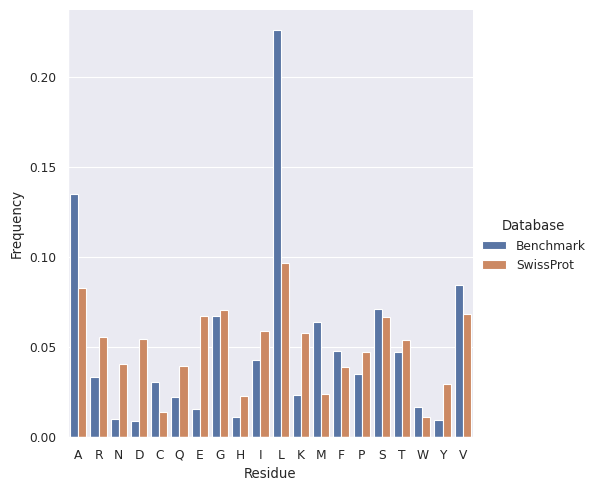

In [33]:
bench_plot = sns.catplot(
 data=bench_final,
 x="Residue",
 y="Frequency",
 hue="Database",
 kind="bar"
)
plt.savefig("frequencies_sp_bench_vs_swissprot.png", dpi=300, bbox_inches="tight")

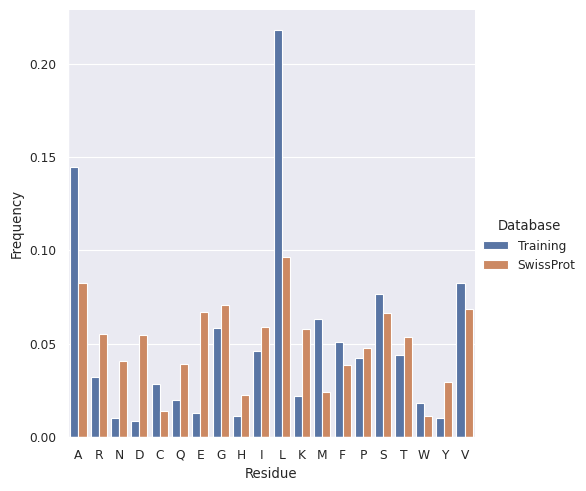

In [34]:
train_plot = sns.catplot(
 data=train_final,
 x="Residue",
 y="Frequency",
 hue="Database",
 kind="bar"
)
plt.savefig("frequencies_sp_train_vs_swissprot.png", dpi=300, bbox_inches="tight")

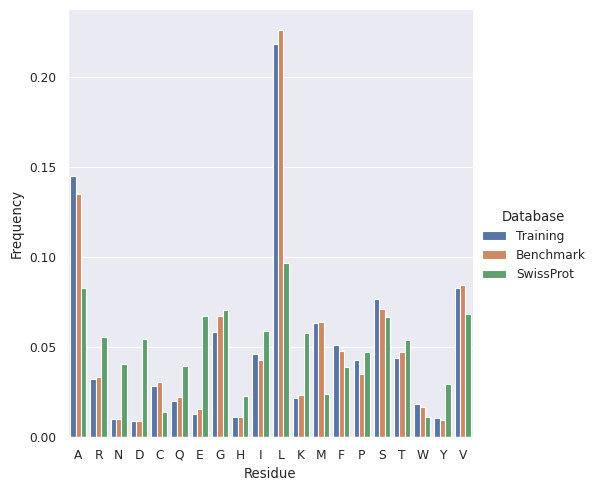

In [35]:
total_final = pd.concat([train_df , bench_df , swiss_df] , ignore_index=True)
total_plot = sns.catplot(
 data=total_final,
 x="Residue",
 y="Frequency",
 hue="Database",
 kind="bar",
)
plt.savefig("frequencies_sp_bench_vs_train_vs_swissprot.png", dpi=300, bbox_inches="tight")

In [36]:
df=pd.read_csv("../Data_Preparation/train_bench.tsv", sep="\t")
df
print("Number of OrganismName unique values: ",df["OrganismName"].nunique())


Number of OrganismName unique values:  435


In [37]:
#Recover the ten most frequent OrganismName to make the unique value number of OrganismName field comparable to Kingdom field unique value number
tmp_var=df.groupby('OrganismName').nunique().sort_values(by='EntryID', ascending=False).head(6).reset_index()
tmp_most_rep=tmp_var['OrganismName'].tolist()
df.loc[~df["OrganismName"].isin(tmp_most_rep), "OrganismName"] = "Other"
print("Number of OrganismName unique values: ",df["OrganismName"].nunique())

Number of OrganismName unique values:  7


## Pie Plot and Bar Plots of Taxonomic classification

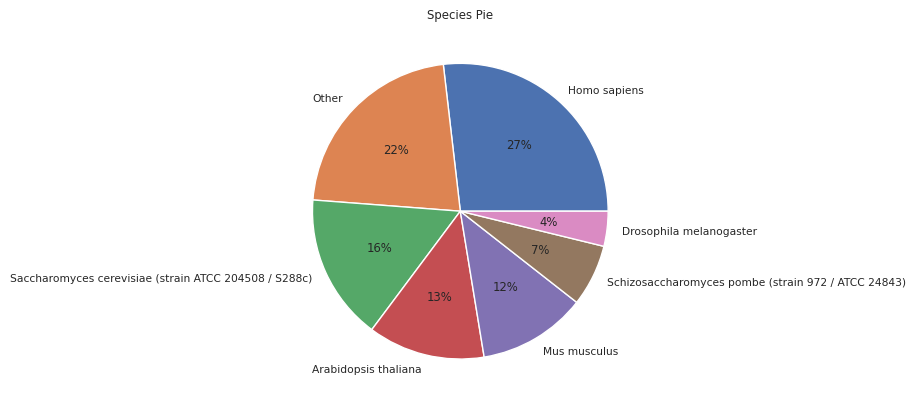

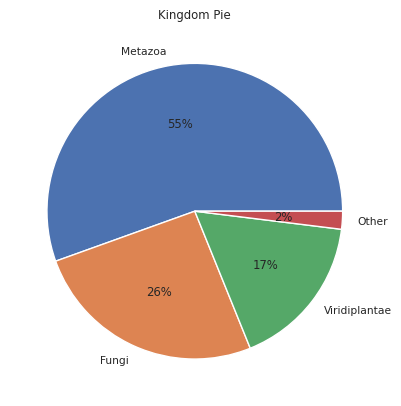

<Figure size 640x480 with 0 Axes>

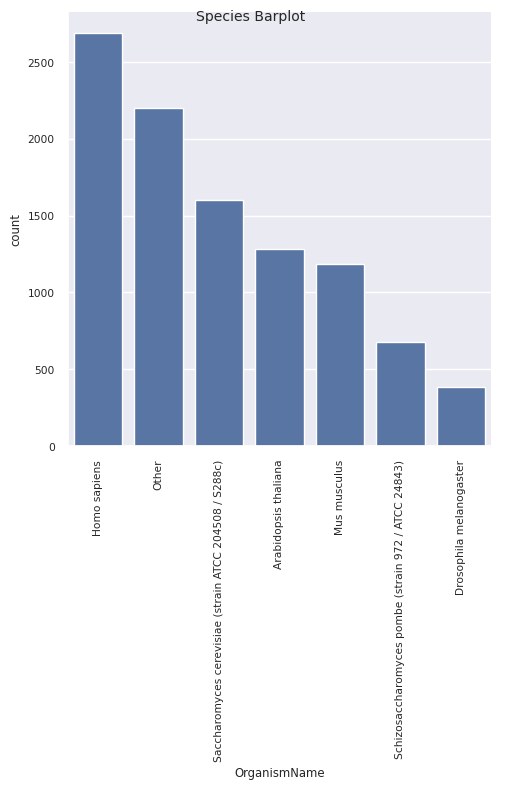

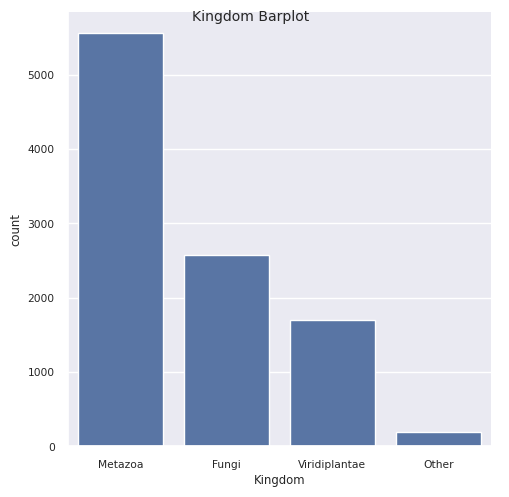

In [38]:

#Create the pie plot with respect of OrganismName
sns.set_theme(context='notebook', style='darkgrid', palette='deep',font='sans-serif', font_scale=0.7,color_codes=True,rc=None)
counts_organismname=df['OrganismName'].value_counts()
plt.pie(counts_organismname, labels=counts_organismname.index,autopct='%1.0f%%')
plt.title("Species Pie")
plt.show()
plt.savefig("species_pie.png", dpi=300, bbox_inches="tight")

#Create the pie plot with respect of Kingdom
counts_kingdom=df['Kingdom'].value_counts()
plt.pie(counts_kingdom, labels=counts_kingdom.index,autopct='%1.0f%%')
plt.title("Kingdom Pie")
plt.show()
plt.savefig("kingdom_pie.png", dpi=300, bbox_inches="tight")

#Create the barplot with respect of OrganismName
counts_organismname=counts_organismname.to_frame(name="count")
sns.catplot(counts_organismname, x="OrganismName",y="count", kind='bar').set_xticklabels(rotation=90).fig.suptitle("Species Barplot")   
plt.savefig("species_barplot.png", dpi=300, bbox_inches="tight")

#Create the barplot with respect of Kingdom
counts_kingdom=counts_kingdom.to_frame(name="count")
sns.catplot(counts_kingdom, x="Kingdom",y="count", kind='bar').fig.suptitle("Kingdom Barplot")
plt.savefig("kingdom_barplot.png", dpi=300, bbox_inches="tight")

## SeqLogo of benchmark sequences

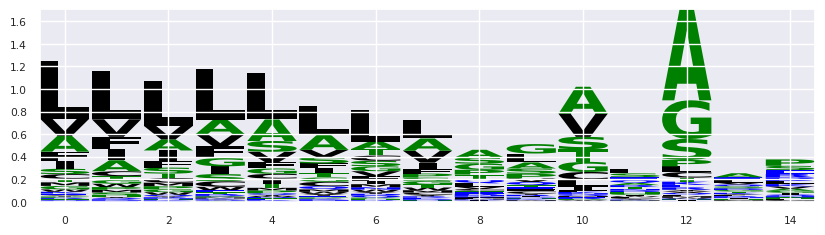

In [39]:
#We need to select the positive and benchmark sequences from the original dataframe
bench_pos=df.query('Class=="Positive" and Set=="Benchmark"')
#you have to recover the region -12 and +3 after cleavage site
bench_seqs=[]
for index,row in bench_pos.iterrows():
        sequence_to_recover=row["Sequence"]
        cleavage_position=int(row["SPEnd"])
        bench_seqs.append(sequence_to_recover[cleavage_position-13:cleavage_position+2])

# Information matrix used to construct the sequence logo
ww_counts_df = lm.alignment_to_matrix(sequences=bench_seqs, to_type='information',characters_to_ignore='.-X') #create a matrix that will be used to build the logo, with the frequencies of the aminoacid in that position

#draw the sequence logo
lm.Logo(ww_counts_df,color_scheme="hydrophobicity")
plt.savefig("sequence_logo_benchmark.png", dpi=300, bbox_inches="tight")

## SeqLogo of training sequences

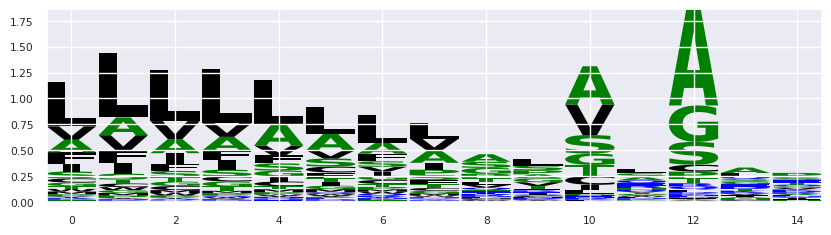

In [40]:
#We need to select the positive and training sequences from the original dataframe
train_pos=df.query('Class=="Positive" and (Set=="1" or Set=="2" or Set=="3" or Set=="4" or Set=="5")')
train_seqs=[]
#you have to recover -12 from SPend and +3 after SPend
for index,row in train_pos.iterrows():
        sequence_to_recover=row["Sequence"]
        cleavage_position=int(row["SPEnd"])
        train_seqs.append(sequence_to_recover[cleavage_position-13:cleavage_position+2])
    
# Information matrix used to construct the sequence logo
ww_counts_df = lm.alignment_to_matrix(sequences=train_seqs, to_type='information',characters_to_ignore='.-X') #create a matrix that will be used to build the logo, with the frequencies of the aminoacid in that position

#draw the sequence logo
logo=lm.Logo(ww_counts_df,color_scheme="hydrophobicity")
plt.savefig("sequence_logo_training.png", dpi=300, bbox_inches="tight")
